In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [24]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [26]:
# make suare images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [27]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [31]:
# Build the model
model = keras.Sequential(
[
    keras.Input(shape=input_shape),
    tf.keras.layers.Flatten(),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [32]:
batch_size = 128
epochs = 30

model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 1s 2ms/step - loss: 0.7008 - accuracy: 0.8286 - val_loss: 0.3493 - val_accuracy: 0.9122
Epoch 2/30
422/422 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8987 - val_loss: 0.2859 - val_accuracy: 0.9243
Epoch 3/30
422/422 [==============================] - 1s 2ms/step - loss: 0.3312 - accuracy: 0.9091 - val_loss: 0.2614 - val_accuracy: 0.9288
Epoch 4/30
422/422 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.9137 - val_loss: 0.2500 - val_accuracy: 0.9332
Epoch 5/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2968 - accuracy: 0.9176 - val_loss: 0.2452 - val_accuracy: 0.9325
Epoch 6/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2882 - accuracy: 0.9199 - val_loss: 0.2375 - val_accuracy: 0.9348
Epoch 7/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2814 - accuracy: 0.9214 - val_loss: 0.2343 - val_accuracy: 0.9358
Epoch 

In [33]:
# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.2631862759590149
Test accuracy:  0.9276999831199646


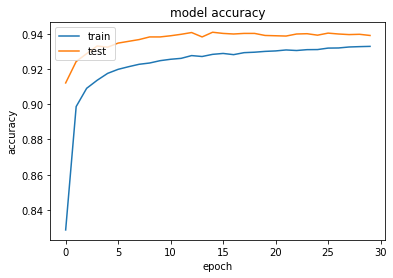

In [34]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

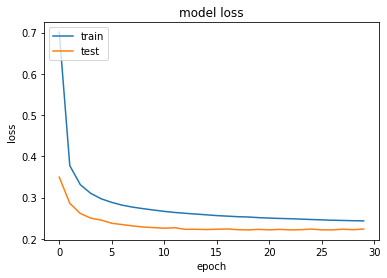

In [35]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
a_val_img = x_test[0]

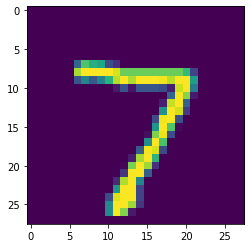

In [37]:
plt.imshow(a_val_img)

In [38]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [39]:
np.shape(a_val_img)

(28, 28, 1)

In [40]:
model.predict(np.array([a_val_img]))

array([[3.5876508e-07, 8.5099771e-13, 1.5497211e-06, 6.1085708e-03,
        2.7491686e-07, 2.5504532e-05, 1.3462750e-11, 9.9342138e-01,
        1.3341409e-05, 4.2908371e-04]], dtype=float32)

In [41]:
# save the model to file
model.save('./Data/dense_softmax_model.h5')